In [ ]:
# https://github.com/DataThinkers/Machine-Learning-Projects-Code/blob/main/Heart%20Disease%20Prediction%20Using%20Machine%20Learning(1).ipynb

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv")

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data_dup=data.duplicated().any()

In [15]:
print(data_dup)

False


In [13]:
data=data.drop_duplicates()

In [16]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [18]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
data['cp'].unique()

array([0, 1, 2, 3])

In [21]:
type(cate_val)

list

In [22]:
cate_val.remove('sex')

In [23]:
cate_val.remove('target')

In [29]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [30]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [36]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [37]:
X=data.drop('target',axis=1)

In [38]:
y=data['target']

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression

In [52]:
log=LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [53]:
y_pred1=log.predict(X_test)

In [54]:
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [55]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [64]:
from sklearn import svm

In [65]:
svm = svm.SVC()

In [66]:
svm.fit(X_train,y_train)

SVC()

In [67]:
y_pred2=svm.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier()

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred3=knn.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [76]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [77]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [79]:
import matplotlib.pyplot as plt

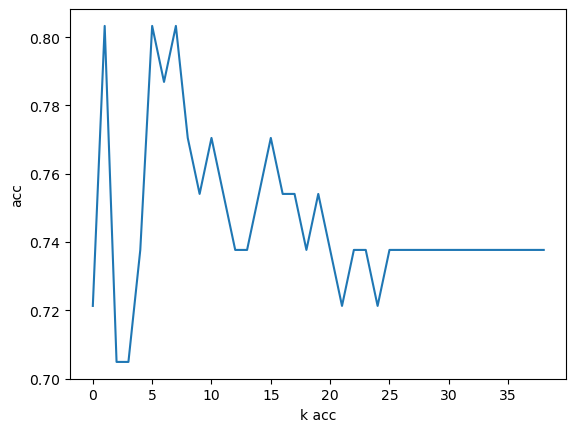

In [83]:
plt.plot(score)
plt.xlabel('k acc')
plt.ylabel('acc')
plt.show()

In [92]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [93]:
#Non-Linear ML Algorithms

In [1]:
import pandas as pd
data=pd.read_csv('heart.csv')

In [3]:
data=data.drop_duplicates()

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X=data.drop('target',axis=1)

In [6]:
y=data['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred4=dt.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred4)

0.7377049180327869

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf=RandomForestClassifier()

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred5=rf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred5)

0.8032786885245902

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
gbc=GradientBoostingClassifier()

In [25]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [26]:
y_pred6=gbc.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [29]:
final_data = pd.DataFrame({'Models':['SVM','KNN','DT','RF','GB'],
                          'ACC':[
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

NameError: name 'y_pred2' is not defined